# Assignment 3
### BMI 2005

*Binary is just a (Python) construct*

By: Ryan Neff  
Due: 3/6/2019

## Problem 1

Suppose we have numbers between `1` and `1000` in a BST and we search for the number `363`. Which (at least one) of the following sequences could not be the sequence of nodes examined?  
```a) 2, 252, 401, 398, 330, 344, 397, 363
b) 924, 220, 911, 244, 898, 258, 362, 363
c) 925, 202, 911, 240, 912, 245, 363
d) 2, 399, 387, 219, 266, 382, 381, 278, 363 
e) 935, 278, 347, 621, 299, 392, 358, 363
```

**Answer:** C, E

C is not the right answer because 912 is greater than 911 so it would be on the right link of 911, not under its left link with 240.  
E is not the right answer because 299 is less than 347 and so would be on the left link of 347, not under its right link with 621.  

## Problem 2

Define a hash table with an associated hash function `h(k)` mapping keys `k` to to their associated hash value.

### Problem 2a

Suppose we wish to search a linked list of length `n`, where each element contains a key `k` along with a hash value `h(k)`. Each key is a long character string. In words, how might we take advantage of the hash values when searching the list for an element with a given key?

**Answer**: We could make the linked list of strings into a binary search tree of hashes where we could compare the hash values of the item we are searching for and check if it is greater than or less than the hash value of the node. 

### Problem 2b

Consider a hash table of size `m = 1000` and a corresponding hash function `h(k) = floor(m (kA mod 1))` for `A = (sqrt(5) - 1)/2)`. This type of divisive hashing has been shown to yield effective randomly distributed hashes. Note that `mod 1` means take the fractional component of `kA` i.e. `kA - floor(kA)`.
Compute the hashes for `keys = {61, 62, 63, 64, 65}`.

In [6]:
import math

def h(k):
    m = 1000
    A = (math.sqrt(5)-1)/2
    return math.floor(m*(k*A % 1))

keys = [61, 62, 63, 64, 65]

for key in keys:
    print("key: {}, hash: {}".format(key,h(key)))

key: 61, hash: 700
key: 62, hash: 318
key: 63, hash: 936
key: 64, hash: 554
key: 65, hash: 172


### Problem 2c

In simple uniform hashing, each key is assumed to have equal probability to map to any of the hashes in a given table of size `m`. Given an open-address table of size `100` and `2` random keys, what is the probability that they hash to the same value? What is the probability that they hash to different values?

**Answer:**

P(different keys) $= N/N * (N-1)/N = 100/100 * 99/100 = 1 * 99/100 = 99/100$   
P(same key) $= N/N * 1/N = 100/100 * 1/100 = 1/100 $

## Problem 3

Binary Search Trees are defined by each parent having at most 2 child nodes and maintain the invariant that all descendents to the left of a node are smaller than the node, while all descendants to the right are greater for all subtrees.

### Problem 3a

What are all the possible valid BSTs drawn from the array `[1, 2, 3]`? How many are there?

**Answer:** There are 5 valid BSTs. They are:  
1-(right1)2-(right2)3  
1-(right1)3-(left3)-2  
2-(left2)1-(right2)3  
3-(left3)1-(right1)2  
3-(left3)2-(left2)1  

### Problem 3b

In lab we explored the number of possible binary tree topologies given a height of n and n nodes (spoiler: `2n−1` ). It turns out that the number of binary tree topologies (given all possible heights) with `n` nodes is the 

**Catalan Number**

$C_n =\frac{1}{(n+1)}*(2n\;choose\;n)$.

Recursively, this can also be written as:  

$C_n = \sum\limits_{k=0}^{n-1} c_k*c_{n−1−k}$ with $c_0 = 1$ and $n >= 1$.

i) Write a function `cn_recursive(n)` that computes the n-th catalan number recursively.  


ii) Write a function `cn_fast(n)` that computes the n-th catalan number using the closed form formulation.  


iii) Conduct doubling experiments (just `n = 1, 2, 4,` and `8`) to compare their runtimes. Plot the result on a log-log plot. What are the first 8 Catalan Numbers?  



In [70]:
def cn_recursive(n):
    if n==0:
        return 1
    sum_catalan = 0
    for k in range(0,n):
        sum_catalan += cn_recursive(k)*cn_recursive(n-1-k)
    return sum_catalan

for n in range(1,9):
    print("catalan number for {}: {}".format(n,cn_recursive(n)))

catalan number for 1: 1
catalan number for 2: 2
catalan number for 3: 5
catalan number for 4: 14
catalan number for 5: 42
catalan number for 6: 132
catalan number for 7: 429
catalan number for 8: 1430


In [69]:
import math
def cn_fast(n):
    return int(1/(n+1)*(math.factorial(2*n)/(math.factorial(n)**2)))
for n in range(1,9):
    print("catalan number for {}: {}".format(n,cn_fast(n)))

catalan number for 1: 1
catalan number for 2: 2
catalan number for 3: 5
catalan number for 4: 14
catalan number for 5: 42
catalan number for 6: 132
catalan number for 7: 429
catalan number for 8: 1430


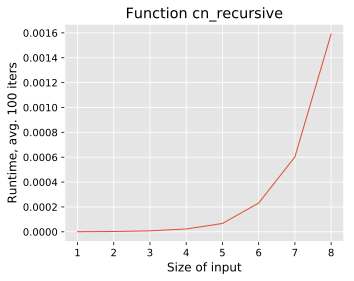

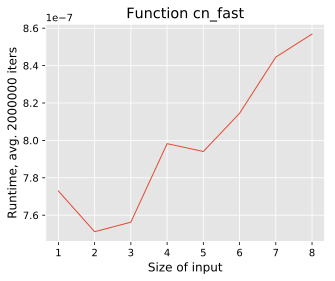

In [68]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from IPython.display import set_matplotlib_formats
import time
%matplotlib inline
set_matplotlib_formats('svg')

plt.style.use('ggplot')
rcParams['figure.figsize'] = (5,4)
rcParams['figure.dpi'] = 200
rcParams['font.family'] = 'DejaVu Sans'

COLOR = 'black'
rcParams['text.color'] = COLOR
rcParams['axes.labelcolor'] = COLOR
rcParams['xtick.color'] = COLOR
rcParams['ytick.color'] = COLOR

def runtime(function,params,iters=100):
    t0 = time.time()  # start time
    for i in range(iters):
        function(*params)
    t1 = time.time() # end time
    return((t1-t0)/iters)

def calc_time_doubling(function,start = 1,end=10,iters=100):
    timings = []
    sizes = []
    for size in range(start,end+1):
        timing = runtime(function,[size],iters=iters)
        timings.append(timing)
        sizes.append(size)
    return timings, sizes

function=cn_recursive
times, sizes = calc_time_doubling(function,start=1,end=8,iters=100)
plt.plot(sizes,times,linewidth="1")
plt.title("Function "+function.__name__)
plt.xlabel("Size of input")
plt.ylabel("Runtime, avg. 100 iters")
plt.show()

function=cn_fast
times, sizes = calc_time_doubling(function,start=1,end=8,iters=2000000)
plt.plot(sizes,times,linewidth="1")
plt.title("Function "+function.__name__)
plt.xlabel("Size of input")
plt.ylabel("Runtime, avg. 2000000 iters")
plt.show()

## Problem 4

As discussed in lab and lecture, binary search trees derive a lot of their power from being appropriately balanced. Here we will show that the search time (here approximated by the number of compares made) for random keys in a BST containing uniformly randomly distributed values is `c lg n` where `n` is the amount of nodes in the tree and `c = 1.39` - note that this is `lg base 2`. In greater detail:

### Problem 4a

Create a dict mapping keys `(N = 100, 200, 400, ... 51200)` to arrays with linear entries derived from random sampling from a uniform distribution [0, 100000].

In [130]:
import numpy as np

def get_dict(size):
    return {a:b for a,b in zip(range(0,size),np.random.randint(0,100000,size))}

dicts = {(2**a)*100:get_dict((2**a)*100) for a in range(0,10)}
print("made dictionaries for n=", list(dicts.keys()),"\n")
print("example: dict n=100 values are", list(dicts[100].values())[0:10],"...")

made dictionaries for n= [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600, 51200] 

example: dict n=100 values are [54790, 51430, 63952, 80605, 52975, 57791, 41671, 42219, 91164, 31294] ...


### Problem 4b

Store entries in a binary search tree - the class implementation from lab is provided below, with a small modification to count the number of compares performed in each recursion for `find()`. You may find it helpful to similarly construct an analogous dict in (a) with the keys mapping to BST instances.

In [108]:
class Node:
    def __init__(self, val):
        self.val = val
        self.leftChild = None
        self.rightChild = None
    
    def get(self):
        return self.val
    
    def set(self, val):
        self.val = val
        
    def getChildren(self):
        children = []
        if(self.leftChild != None):
            children.append(self.leftChild)
        if(self.rightChild != None):
            children.append(self.rightChild)
        return children
        

class BST:
    
    def __repr__(self):
        return "<BST, items={}>".format(self.items)
    
    def __init__(self):
        self.root = None
        self.items = 0

    def setRoot(self, val):
        self.root = Node(val)
    
    def insert(self, val):
        if(self.root is None):
            self.setRoot(val)
        else:
            self.insertNode(self.root, val)
        self.items += 1

    def insertNode(self, currentNode, val):
        if(val <= currentNode.val):
            if(currentNode.leftChild):
                self.insertNode(currentNode.leftChild, val)
            else:
                currentNode.leftChild = Node(val)
        elif(val > currentNode.val):
            if(currentNode.rightChild):
                self.insertNode(currentNode.rightChild, val)
            else:
                currentNode.rightChild = Node(val)
                
    def find(self, val, count = 0):
        return self.findNode(self.root, val, count)

    def findNode(self, currentNode, val, count):
        if(currentNode is None):
            return False, count + 1
        elif(val == currentNode.val):
            return True, count + 1
        elif(val < currentNode.val):
            return self.findNode(currentNode.leftChild, val, count+1)
        else:
            return self.findNode(currentNode.rightChild, val, count+1)
    
    def traverse(self):
        if self.root is not None:
            self.inorder_traverse(self.root.leftChild)
            print(self.root.val)
            self.inorder_traverse(self.root.rightChild)

    def inorder_traverse(self, Node):
        if Node.leftChild is not None:
            self.inorder_traverse(Node.leftChild)    
        print(Node.val)
        if Node.rightChild is not None:
            self.inorder_traverse(Node.rightChild)

In [131]:
bsts = dict()
for n,d in dicts.items():
    bsts[n] = BST()
    for key,value in d.items():
        bsts[n].insert(value)

In [132]:
bsts

{100: <BST, items=100>,
 200: <BST, items=200>,
 400: <BST, items=400>,
 800: <BST, items=800>,
 1600: <BST, items=1600>,
 3200: <BST, items=3200>,
 6400: <BST, items=6400>,
 12800: <BST, items=12800>,
 25600: <BST, items=25600>,
 51200: <BST, items=51200>}

### Problem 4c

For each array, compute the average time of 1000 keys drawn at random (from the linear array corresponding to each tree).

In [200]:
def runtime_bst(bst,array,iters=100):
    count = 0
    for i in array:
        _,count_i = bst.find(i)
        count += count_i
    return(count)

for n,d in dicts.items(): #dictionary of dictionaries 100,200,400...
    keys = list(d.keys()) #keys in the dict
    entries = list(d.values()) #entries in the dict
    rand_1000 = np.random.choice(keys,size=1000) #choose 1000 keys at random
    bst = bsts[n] #the BST corresponding with the array
    print("n={},".format(n),"avg runtime:{}".format(runtime_bst(bst,rand_1000)/1000))

n=100, avg runtime:8.0
n=200, avg runtime:5.0
n=400, avg runtime:7.998
n=800, avg runtime:11.877
n=1600, avg runtime:14.318
n=3200, avg runtime:11.977
n=6400, avg runtime:14.952
n=12800, avg runtime:17.096
n=25600, avg runtime:23.413
n=51200, avg runtime:21.263


### Problem 4d

What is your estimated constant `c` for each tree size?

In [209]:
## runtime = c*log2(n)
## runtime/log2(n) = c

def runtime_bst(bst,array,iters=100):
    count = 0
    for i in array:
        _,count_i = bst.find(i)
        count += count_i
    return(count)

for n,d in dicts.items(): #dictionary of dictionaries 100,200,400...
    keys = list(d.keys()) #keys in the dict
    entries = list(d.values()) #entries in the dict
    rand_1000 = np.random.choice(keys,size=1000) #choose 1000 keys at random
    bst = bsts[n] #the BST corresponding with the array
    print("n={},".format(n),"c={}".format(runtime_bst(bst,rand_1000)/(np.log2(n)*1000)))

n=100, c=1.2041199826559248
n=200, c=0.6541201032390639
n=400, c=0.9249344071061372
n=800, c=1.2323908368315917
n=1600, c=1.3500746105349377
n=3200, c=1.0401193386977337
n=6400, c=1.18413241777521
n=12800, c=1.2541908799086028
n=25600, c=1.5958228281644644
n=51200, c=1.3754281386237832
